In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
import pandas as pd
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPool2D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from tensorflow.keras import backend as K
import itertools
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn import preprocessing

##from tensorflow.keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score

In [3]:
# filter warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('cm1 (3).csv', delimiter=',')
df['defects'] = df['defects'].replace({False: 0, True: 1})
y = df.defects.copy()
X = df.drop(['defects'],axis=1)

print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

print(X_train.shape)
print(X_test.shape)
print(X_test.iloc[0])
print(y_train.shape)

   McCabe's line count of code  McCabe "cyclomatic complexity”  \
0                          1.1                             1.4   
1                          1.0                             1.0   
2                         24.0                             5.0   
3                         20.0                             4.0   
4                         24.0                             6.0   

   McCabe "essential complexity”  McCabe "design complexity”  \
0                            1.4                         1.4   
1                            1.0                         1.0   
2                            1.0                         3.0   
3                            4.0                         2.0   
4                            6.0                         2.0   

   Halstead total operators + operands  Halstead "volume”  \
0                                  1.3               1.30   
1                                  1.0               1.00   
2                                 6

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 256)               6

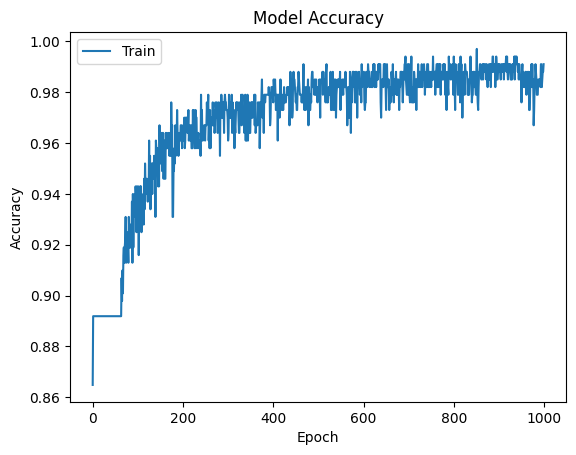

In [4]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =64 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
classifier.add(Dropout(rate = 0.25))
# Adding the second hidden layer
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.25))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the third hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform',kernel_regularizer=regularizers.l2(0.02), activation = 'relu'))

classifier.add(Dense(units = 256, kernel_initializer = 'uniform', kernel_regularizer=regularizers.l2(0.02), activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
optimizer=keras.optimizers. Adam(lr=0.00001)
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
# Fitting the DNN to the Training set
history=classifier.fit(X_train, y_train,epochs =1000, verbose=0)

score, acc = classifier.evaluate(X_train, y_train)
print('Train score:', score)
print('Train accuracy:', acc)

# Train the model and obtain the history object

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
##plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

6/6 [==============================] - 0s 3ms/step
********************
6/6 [==============================] - 0s 3ms/step - loss: 7.4291 - accuracy: 0.9091
Test score: 7.429086208343506
Test accuracy: 0.9090909361839294
[[147   5]
 [ 10   3]]


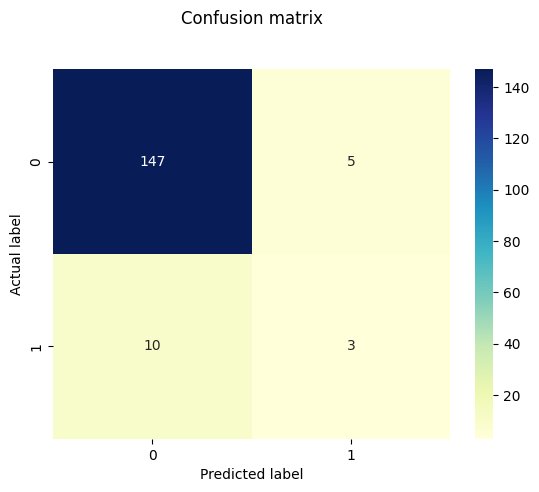

In [5]:
# Part 3 - Making predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       152
           1       0.38      0.23      0.29        13

    accuracy                           0.91       165
   macro avg       0.66      0.60      0.62       165
weighted avg       0.89      0.91      0.90       165

6/6 [==============================] - 0s 3ms/step - loss: 7.4291 - accuracy: 0.9091
False Positive Rates : [0.         0.03289474 1.        ]
True  Positive Rates : [0.         0.23076923 1.        ]
Threshols            : [2 1 0]
Accuracy             : [7.429086208343506, 0.9090909361839294]
AUC                  : 0.5989372469635627


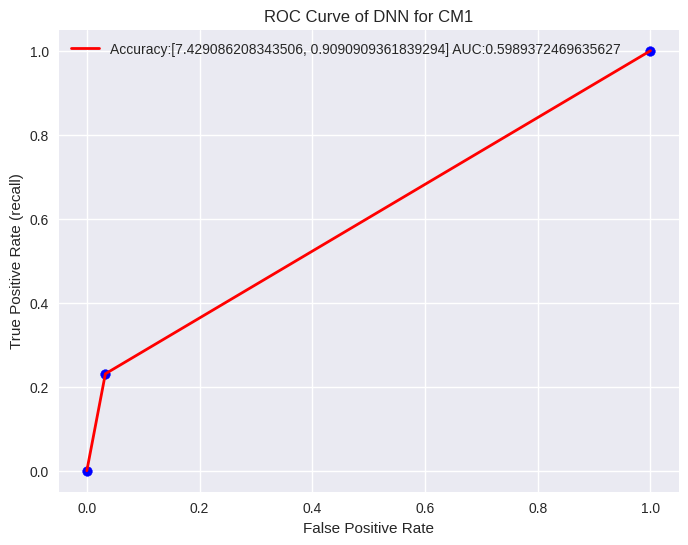

In [6]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_curve, roc_auc_score

#fpr, tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#auc = roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)

acc1 = classifier.evaluate(X_test, y_test)

print("False Positive Rates : {}".format(fpr))
print("True  Positive Rates : {}".format(tpr))
print("Threshols            : {}".format(thresholds))
print("Accuracy             : {}".format(acc1))
print("AUC                  : {}".format(auc))
with plt.style.context(('ggplot','seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(fpr, tpr, c='blue')
    plt.plot(fpr, tpr, label="Accuracy:{} AUC:{}".format((acc1), (auc)), linewidth=2, c='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title('ROC Curve of DNN for CM1')
    plt.legend(loc='best');
    plt.show()

In [7]:
print("------------Classifier Prediction (Test Set)--------------------------")
print(classifier.predict(X_test))
df2=pd.DataFrame(classifier.predict(X_test))
df2.to_csv('classifierPrediction_CM1.csv')
print("------------------------------------------------------------")
#Area under ROC curve
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))
from sklearn.metrics import log_loss

print('Test Log Loss   : %.3f'%log_loss(y_test, classifier.predict(X_test)))
print('Train Log Loss  : %.3f'%log_loss(y_train, classifier.predict(X_train)))


------------Classifier Prediction (Test Set)--------------------------
6/6 [==============================] - 0s 3ms/step
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.57020456e-08]
 [2.20757467e-03]
 [0.00000000e+00]
 [1.48067018e-04]
 [3.23001528e-03]
 [5.35469873e-08]
 [1.14576353e-28]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.68602516e-14]
 [0.00000000e+00]
 [1.31898954e-13]
 [2.05528595e-05]
 [2.20943033e-03]
 [2.42670575e-13]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.16727781e-01]
 [7.06979300e-27]
 [3.09407928e-29]
 [2.05528595e-05]
 [1.10052422e-01]
 [0.00000000e+00]
 [2.44255409e-21]
 [1.68962985e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.04935879e-17]
 [0.00000000e+00]
 [9.92380519e-05]
 [9.16727781e-01]
 [9.16727781e-01]
 [4.58756644e-15]
 [1.48739430e-08]
 [2.20745491e-10]
 [0.00000000e+00]
 [1.13600830e-03]
 [0.00000000e+00]
 [4.39791791e-02]
 [0.00000000e+00]
 [3.96368241e-13]
 [1.19189920e-31]
 [7.29358101e-17]
 [6.79272198e-05]
 [1.24856256e-14]
 [1.07427187e-

In [8]:
X_train= pd.DataFrame(X_test, columns =  ["McCabe's line count of code",
 'McCabe "cyclomatic complexity”',
 'McCabe "essential complexity”',
 'McCabe "design complexity”',
 'Halstead total operators + operands',
 'Halstead "volume”',
 'Halstead "program length”',
 'Halstead "difficulty”',
 'Halstead "intelligence”',
 'Halstead "effort”',
 'Halstead',
 "Halstead's time estimator",
 "Halstead's line count",
 "Halstead's count of lines of comments",
 "Halstead's count of blank",
 'lineslOCodeAndComment',
 'unique operators',
 'unique operands',
 'total operators',
 'total operands',
 'branchCount of the flow graph'
 ])
X_train = X_train.to_numpy()
##X_test = X_test.to_numpy()
explainer = shap.DeepExplainer(classifier,X_train)
shap_values = explainer.shap_values(X_test)
##shap_values = np.array(shap_values)
#shap_values = shap_values.reshape(-1, X_test.shape[1])
##shap_values = shap_values[0].reshape((shap_values[0].shape[0], -1))

print(shap_values)
print(shap_values[:5])
df1= pd.DataFrame(np.concatenate(shap_values))
print(df1)
df1.to_csv('shapcm1.csv')
# Print the base value
print('--------------------BASE VALUE--------------------')
print(explainer.expected_value[0])
print('---------------------------------------------------')
#X_test=pd.DataFrame(X_test, columns = ['Branh Count', 'Call Pairs', 'Condition Count', 'Cyclomatic  Complexity', 'Cyclomatic Density', 'Decision Count', 'Decision Density', 'Decision Complexity', 'Design Desity', 'Edge Count', 'Essential Complexity', 'Essential Density', 'LOC executable', 'Parameter Count', 'Halstead content', 'Halstead Difficulty', 'Halstead Effort', 'Halstead error', 'Halstead Length', 'Halstead Level', 'Halstead Time', 'Halstead Volume', 'Maintenance Severity', 'Modified Condition Count', 'Multiple Condition Count', 'Node Count', 'Normalized Cyclomatic Complexity', 'No. of operands', 'No. of operators', 'Unique operands', 'Unique operators', 'No. of Lines', 'Loc Total'])
X_test=pd.DataFrame(X_test, columns =  ["McCabe's line count of code",
 'McCabe "cyclomatic complexity”',
 'McCabe "essential complexity”',
 'McCabe "design complexity”',
 'Halstead total operators + operands',
 'Halstead "volume”',
 'Halstead "program length”',
 'Halstead "difficulty”',
 'Halstead "intelligence”',
 'Halstead "effort”',
 'Halstead',
 "Halstead's time estimator",
 "Halstead's line count",
 "Halstead's count of lines of comments",
 "Halstead's count of blank",
 'lineslOCodeAndComment',
 'unique operators',
 'unique operands',
 'total operators',
 'total operands',
 'branchCount of the flow graph'
 ])
X_test = X_test.to_numpy()
y_test=pd.DataFrame(y_test, columns=['0', '1'])
feature_names = ["McCabe's line count of code",
 'McCabe "cyclomatic complexity”',
 'McCabe "essential complexity”',
 'McCabe "design complexity”',
 'Halstead total operators + operands',
 'Halstead "volume”',
 'Halstead "program length”',
 'Halstead "difficulty”',
 'Halstead "intelligence”',
 'Halstead "effort”',
 'Halstead',
 "Halstead's time estimator",
 "Halstead's line count",
 "Halstead's count of lines of comments",
 "Halstead's count of blank",
 'lineslOCodeAndComment',
 'unique operators',
 'unique operands',
 'total operators',
 'total operands',
 'branchCount of the flow graph'
 ]
class_names = ['0', '1']
shap.initjs()

[array([[-6.66663862e-03,  3.88526767e-03,  1.78725769e-03, ...,
        -2.50365137e-03,  2.07071614e-04,  4.87854309e-03],
       [ 6.54598128e-03, -2.53619558e-02, -1.98090919e-02, ...,
         5.11206945e-03, -6.88390184e-04, -3.97749228e-02],
       [-2.79598136e-03, -4.40650617e-03, -6.55765961e-03, ...,
         3.20391878e-04,  1.09231045e-04, -5.71135719e-03],
       ...,
       [-2.39127329e-03, -3.70375531e-04, -2.15826711e-03, ...,
        -6.87915857e-03,  3.11536793e-03, -4.50951343e-04],
       [-5.86717246e-03,  1.75524385e-03,  6.53776399e-03, ...,
        -5.87528350e-04,  5.19386593e-03,  5.14015533e-03],
       [-6.18180164e-03,  2.03988189e-04, -3.91198325e-03, ...,
         9.80095620e-04,  1.64032323e-05,  1.25204034e-04]])]
[array([[-6.66663862e-03,  3.88526767e-03,  1.78725769e-03, ...,
        -2.50365137e-03,  2.07071614e-04,  4.87854309e-03],
       [ 6.54598128e-03, -2.53619558e-02, -1.98090919e-02, ...,
         5.11206945e-03, -6.88390184e-04, -3.9774922

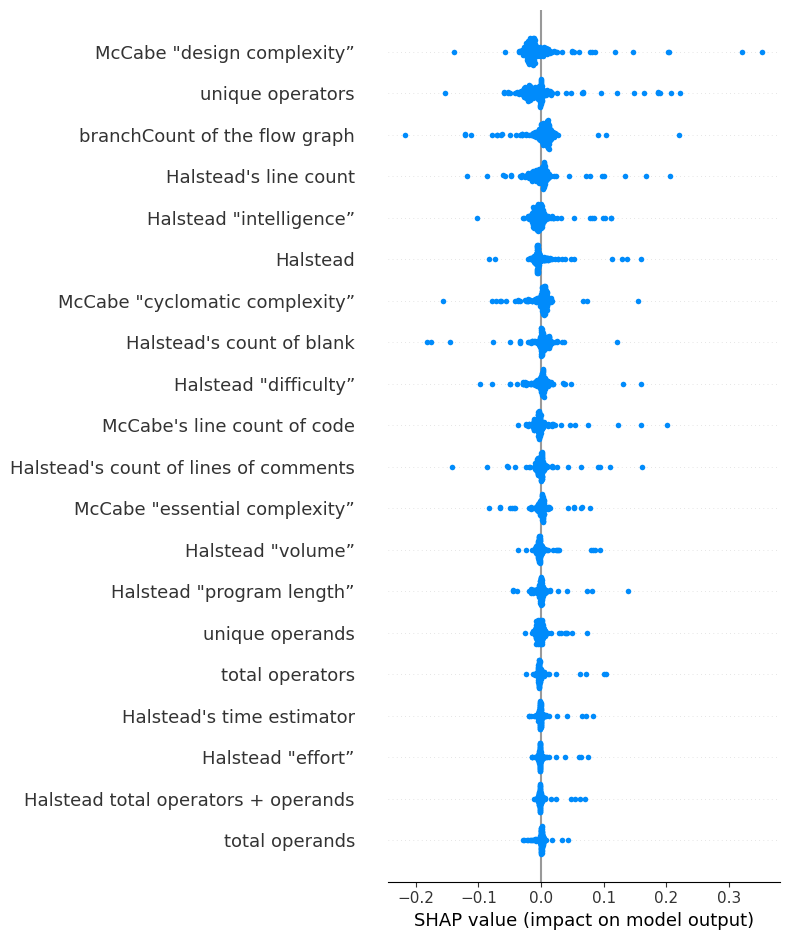

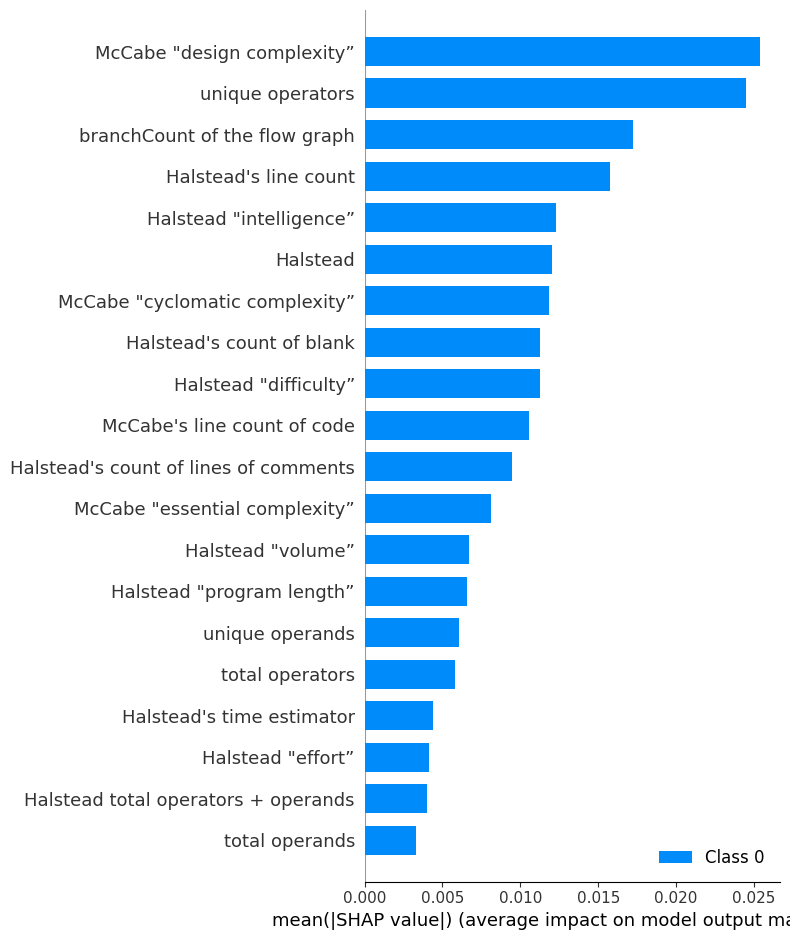

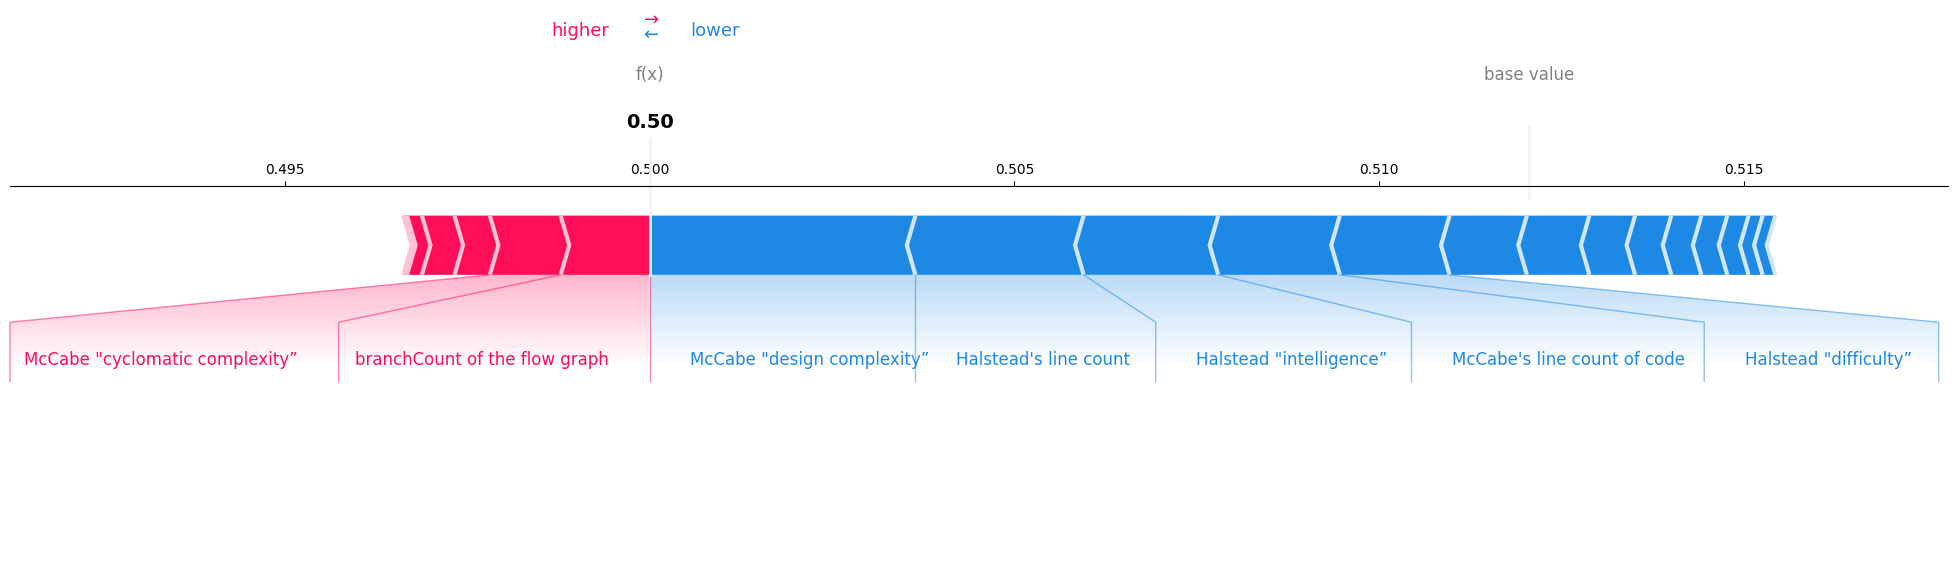

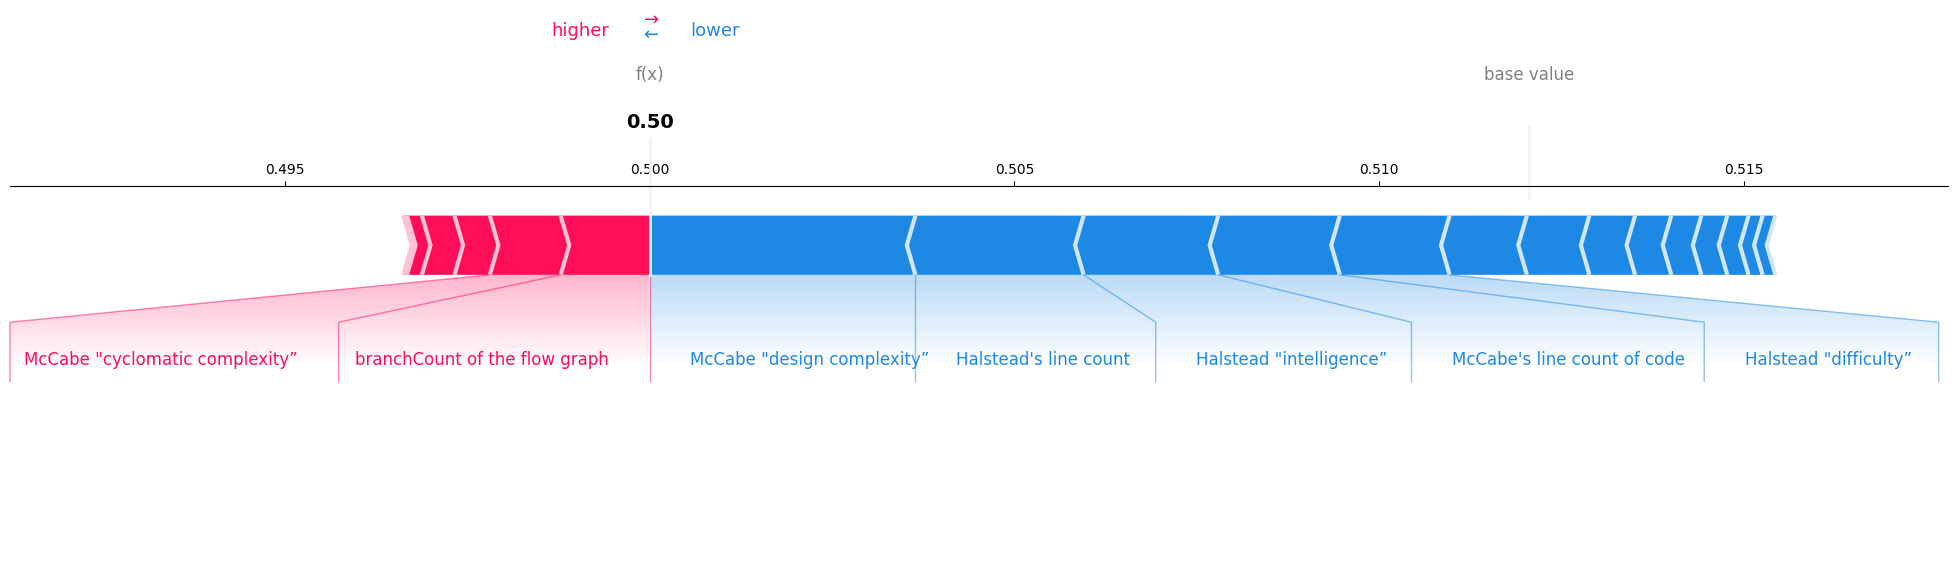

In [9]:
shap.summary_plot(shap_values[0], class_names=class_names, feature_names=feature_names, show=True, plot_size='auto', alpha=1)
shap.summary_plot(shap_values, X_test, feature_names = feature_names  )
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = feature_names, show=False, figsize=(25, 5), matplotlib=True, link="logit")

In [10]:
#we consider a threshold of mean(SHAP value) 0.02
#and seperate the features that pass that threshold
#in this case four features pass the threshold "branchCount of the flow graph" ,'Halstead "dificulty"','McCabe "design complexity" , 'unique operators'


In [11]:
import pandas as pd

# Assuming 'original.csv' is the name of your original CSV file
# Replace it with the actual name of your CSV file
original_csv_path = 'cm1 (3).csv'

# Read the original CSV file
df = pd.read_csv(original_csv_path)

# Specify the columns you want to keep
selected_columns = ['McCabe "design complexity”', 'unique operators','defects']

# Create a new DataFrame with only the selected columns
new_df = df[selected_columns]

# Specify the name for the new CSV file
new_csv_path = 'selected_columns.csv'

# Save the new DataFrame to a new CSV file
new_df.to_csv(new_csv_path, index=False)

# Display the new DataFrame
print(new_df.head())

new_csv_path

   McCabe "design complexity”  unique operators  defects
0                         1.4               1.2    False
1                         1.0               1.0     True
2                         3.0              15.0    False
3                         2.0              16.0    False
4                         2.0              16.0    False


'selected_columns.csv'

In [12]:
new_df = pd.read_csv('selected_columns.csv', delimiter=',')
new_df['defects'] = df['defects'].replace({False: 0, True: 1})


In [13]:
new_df

,"McCabe ""design complexity”",unique operators,defects
0,1.4,1.2,0
1,1.0,1.0,1
2,3.0,15.0,0
3,2.0,16.0,0
4,2.0,16.0,0
...,...,...,...
493,3.0,23.0,1
494,3.0,22.0,1
495,10.0,32.0,1
496,1.0,13.0,1


In [14]:
y = new_df.defects.copy()
X = new_df.drop(['defects'],axis=1)

print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

print(X_train.shape)
print(X_test.shape)
print(X_test.iloc[0])
print(y_train.shape)

   McCabe "design complexity”  unique operators
0                         1.4               1.2
1                         1.0               1.0
2                         3.0              15.0
3                         2.0              16.0
4                         2.0              16.0
(333, 2)
(165, 2)
McCabe "design complexity”     2.0
unique operators              16.0
Name: 149, dtype: float64
(333,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                96        
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10657 (41.63 KB)
Trainable params: 10657 (41.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
11/11 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.9009
Train score: 0.28207433223724365
Train accuracy: 0.900900900363

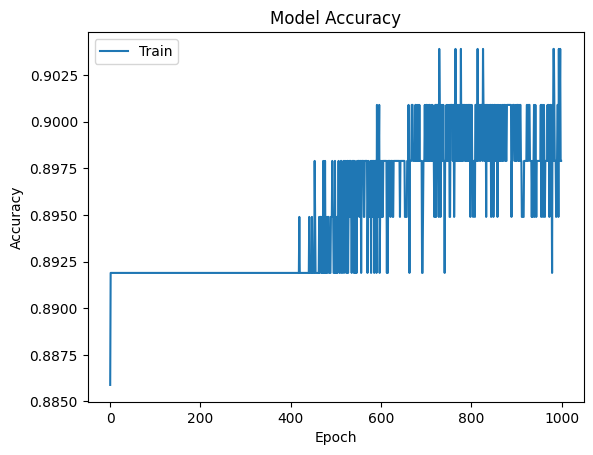

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier1 = Sequential()
# Adding the input layer and the first hidden layer
classifier1.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=2))
# Adding the second hidden layer
classifier1.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
# Adding the third hidden layer
classifier1.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
# Adding the output layer
classifier1.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
optimizer = keras.optimizers.Adam(lr=0.00001)
classifier1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
classifier1.summary()
# Fitting the DNN to the Training set
history=classifier1.fit(X_train, y_train, epochs=1000, verbose=0)

score, acc = classifier1.evaluate(X_train, y_train)
print('Train score:', score)
print('Train accuracy:', acc)


# Train the model and obtain the history object

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
##plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
